# Analyzing Data with IBM Db2, SQL, and Python
## George Jordan
*Last update: January 13, 2021*


I am currently working through the 'IBM Data Science Professional Certificate' through Coursera. The certificate is a nine-course suite, with the fifth course being 'Databases and SQL for Data Science'. I have recently completed this course and will use the work here to demonstrate my skills in these tools.

First, I will provide a brief overview of the queries that I wrote to fulfill the requirements of the assignment (which scored 100%). Then, I will visually display the data by comparing variables via scatterplot. I will use regression analysis to describe the relationships between variables. In doing so, I hope to provide interpretation that might otherwise not be obvious by simply viewing the data within the databases.

I believe that data does not speak for itself and requires a storyteller to communicate findings so that stakeholders can make informed decisions with the data. I firmly believe that this work is a waste of time if teams cannot use the work either for lack of interpretation or techincal knowledge. I hope that I can be that bridge to connect the data to those otherwise unable to use it.

In this project, I used three separate data sets to gain insight into Chicago's neighborhoods and schools. The data is made available through the city of Chicago's public data portal. For the scope of the project, the crime data has been truncated to around five hundred rows, as opposed to the original which contained around 6.5 million rows.

1.  <a href="https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2">Socioeconomic Indicators in Chicago</a>
2.  <a href="https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t">Chicago Public Schools</a>
3.  <a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">Chicago Crime Data</a>

### Preparation

In [1]:
%load_ext sql

I connected to Db2 by instantiating an API token which allowed me to run all of my queries through a Jupyter notebook. For the sake of streamlining the project, doing this project through the Jupyter notebooks on Watson Labs allows for all of the IBM technologies to come packaged without having to reinstall each time I run the notebook.

In [4]:
%sql ibm_db_sa://tjk69312:mkjv%402qs5xgnc01k@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB

'Connected: tjk69312@BLUDB'

In [5]:
# Verifying the connection was established with a simple query
%sql select count(*) from CHICAGO_CRIME_DATA

 * ibm_db_sa://tjk69312:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


1
533


### Sample Queries

In the next few cells, I will demonstrate some of the queries that I wrote in order to fulfill the requests for the assignment.

##### List the top 5 Community Areas by average College Enrollment [number of students]

In [9]:
%sql select COMMUNITY_AREA_NAME, avg(COLLEGE_ENROLLMENT) \
as AVERAGE_COLLEGE_ENROLLMENT \
from CHICAGO_PUBLIC_SCHOOLS \
group by COMMUNITY_AREA_NAME \
order by avg(COLLEGE_ENROLLMENT) desc limit 5

 * ibm_db_sa://tjk69312:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,average_college_enrollment
ARCHER HEIGHTS,2411.500000
MONTCLARE,1317.000000
WEST ELSDON,1233.333333
BRIGHTON PARK,1205.875000
BELMONT CRAGIN,1198.833333


##### Use a sub-query to determine which Community Area has the least value for school Safety Score?

In [10]:
%sql select COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, SAFETY_SCORE \
from CHICAGO_PUBLIC_SCHOOLS \
where SAFETY_SCORE = (select min(SAFETY_SCORE) from CHICAGO_PUBLIC_SCHOOLS)

 * ibm_db_sa://tjk69312:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_number,community_area_name,safety_score
40,WASHINGTON PARK,1


##### Which schools in Community Areas 10 to 15 are healthy school certified?

In [11]:
%sql select NAME_OF_SCHOOL from CHICAGO_PUBLIC_SCHOOLS \
where COMMUNITY_AREA_NUMBER between 10 and 15 \
and HEALTHY_SCHOOL_CERTIFIED = 'Yes'

 * ibm_db_sa://tjk69312:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school
Rufus M Hitch Elementary School


### Visualizing the Data

In [ ]:
# Run matplotlib to graph some of the schools on scatter plot
# Centered around Community_area, 77 different neighborhoods
# From CHICAGO_PUBLIC_SCHOOLS: Safety_Score, Rate_of_Misconduct, College_Enrollment_rate
# From CENSUS_DATA: Percent_of_housing_crowded, Perent_of_households_below_poverty, per_capita_income, hardship_index
# From CHICAGO_CRIME_DATA: Community

I will use the Pandas library to organize the data within the notebook environment.

In [11]:
import pandas as pd

For the visualization of the data, I will be using the Python libraries Matplotlib and Numpy.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

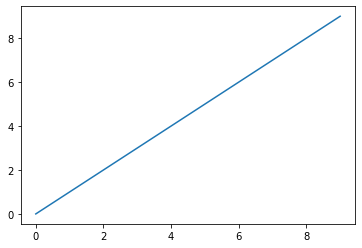

In [10]:
# DELETE

plt.plot(np.arange(10))

### Regression Analysis

In [8]:
# Use the scatter plots from above and scikit learn to create regression lines to predict the impact of variables on others